<div>
    <h1 style="text-align: center;">Project 6 | Classification Model (Titanic Survivability)</h1>
    <hr>
    <h3 style="text-align: center;">Analyst : Jay Cee I. Macaraig</h3>
</div>

<h1> BASIC OF MACHINE LEARNING </h1>

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('datasets\\Titanic.csv') 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age","Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [4]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [6]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8111888111888111


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

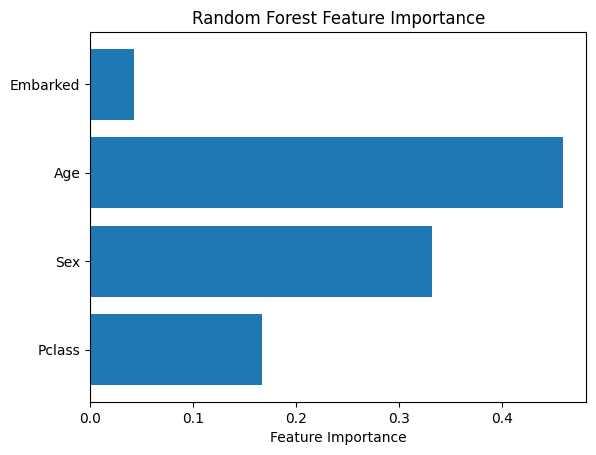

In [7]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


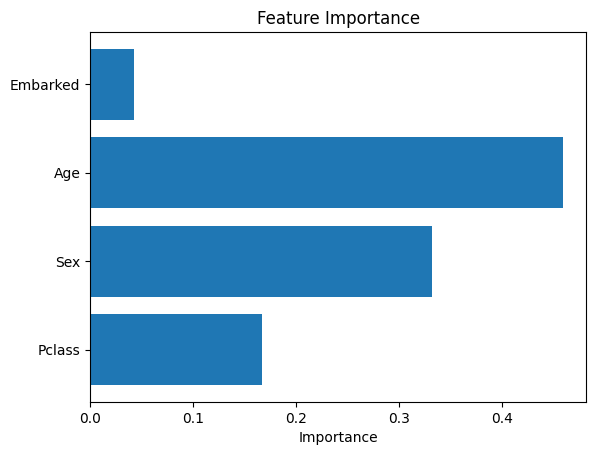

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

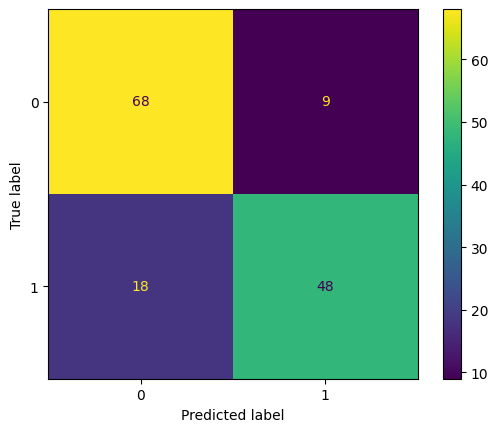

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Cherbourg
        </li>
        <li>
             1   - Queenstown
        </li>
        <li>
             2   - Southhampton
        </li>
        </ul>
    </li>
    
</ul>

In [10]:
# [Pclass=3, Sex=0 (male), Age=22]
prediction_model_test = pd.DataFrame([[3, 1, 22, 0]], columns=["Pclass", "Sex", "Age", "Embarked"])
prediction_test = model.predict(prediction_model_test)[0]


if prediction_test == 1:
    print(f"Passenger whose: Passenger Class is 3rd Class,\nis a Male,\n is 22 years old,\nand is embarked on Cherbourgh\nMost Likely survive")
elif prediction_test == 0:
    print(f"Passenger whose Passenger Class is 3rd Class,\nis a Male,\n is 22 years old,\nand is embarked on Cherbourgh\nMost unlikely survive")
else:
    print('Prediction Failed')


Passenger whose: Passenger Class is 3rd Class,
is a Male,
 is 22 years old,
and is embarked on Cherbourgh
Most Likely survive


<br>
<br>
<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [13]:
# Keep only useful columns

df2 = pd.read_csv("datasets\\Titanic.csv")

# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()

# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>selecting X and y </h1>

In [14]:
from sklearn.linear_model import LogisticRegression

X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
885,3,1,39.0,29.1250,2
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,0
889,1,0,26.0,30.0000,1


<h1> Accuracy Test </h1>
<br>
<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


<h1>Feature Selection </h1>

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> Manual Testing </h1>

<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        Age
    </li>
    <li>
        Fare
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Cherbourg
        </li>
        <li>
             1   - Queenstown
        </li>
        <li>
             2   - Southhampton
        </li>
        </ul>
    </li>
    
</ul>

In [ ]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]
pclass = 3
sex = 0
age = 22
fare = 7.25
embarked = 2

embarked_list = ['Cherbourg', 'Queenstown', 'Southhampton']

prediction_model = pd.DataFrame([[pclass, sex, age, fare, embarked]], columns=["Pclass", "Sex", "Age", "Fare", "Embarked"])
prediction = model.predict(prediction_model)[0]

if prediction == 1:
    print(f"Passenger whose:\nPassenger Class is {pclass},\nis a {'Male' if sex == 0 else 'Female'},\nis {age} years old,\nhad a fare of {fare},\nand is embarked on {embarked_list[embarked]}\n\nMost Likely survive")
elif prediction == 0:
    print(f"Passenger whose:\nPassenger Class is {pclass},\nis a {'Male' if sex == 0 else 'Female'},\nis {age} years old,\nand had a fare of {fare},\nand is embarked on {embarked_list[embarked]}\n\nMost Unlikely survive")
else:
    print('Prediction Failed')

<hr>
   <h3 style="text-align: right; margin-right: 80px;">Analyst : Jay Cee I. Macaraig</h3>
   <h3 style="text-align: right; margin-right: 80px;">BSIT-3B</h3>